# Final Project Group 6 Section 1 
##### Project members: Eric Zhang, Kaitlyn Kaminuma, Susu Zhao, Supitchaya Phongkusonjit 

<span style="color: darkblue; font-size: 30px;">Introduction</span>

Formula One is the highest level of international motor racing for single-seater, open-wheel race cars. It is known for its speed, advanced technology, and global popularity. Each race, known as a Grand Prix, is held at different locations around the world. The season runs from March to December, with drivers competing for points toward a World Championship title. In our project, we chose to focus on pit stops, a crucial and highly strategic part of every race. A pit stop occurs when a driver pulls into a designated lane off the track to quickly change tires or make necessary repairs to the car. Pit stops require the synchronized efforts of a highly trained crew and must be completed in just a few seconds. Any delay during a pit stop can cost a driver several positions in the race. Although the stationary tire change takes only 2-3 seconds, pit stop duration in this dataset measures the total amount of time a Formula One car spends in the pit lane during a pit stop, including entering, servicing, and exiting. Our main question is how pit stop performance has changed over time and how it varies between different teams. This is relevant in understanding if technological advancements, better training, and improved strategies have led to faster and more consistent pit stops. The pit stops dataset is important because pit stop duration, although brief, can have a major impact on the final outcome of a race. It can provide valuable indications of changes in strategy, human skill, and mechanical precision.

Our findings show that pit stop durations have generally increased over time, with noticeable peaks during the fall season, particularly in September and October. We also found that pit stop times are fairly consistent across different nationality teams. Furthermore, pit stop duration shows variation between different Grand Prix locations. This suggests that differences in pit stop duration are more influenced by race and track conditions rather than team-specific performance. The structure of this project will begin with a description of the pit stops dataset, followed by an analysis of the results, and will conclude with a discussion of the implications of our findings.


<span style="color: darkblue; font-size: 30px;">Data Description</span>

We will be using 5 dataset tables in total: races, pit_stops, constructors, drivers, constructor_standings. The races table (1102 observations) contains information about each Grand Prix event, including the race name, location, date, and the season (year) it took place. Each race has a unique ID. The pit_stops table (9634 observations) records detailed data on each pit stop during races, such as the driver, race ID, lap number, stop duration, and the time it occurred in the race. The constructors table (211 observations) lists all Formula One teams (known as constructors), providing details like the constructor’s name, nationality, and a unique constructor ID. The drivers table (857 observations) includes information about the drivers, such as their full name, date of birth, nationality, and a unique driver ID. The constructor_standings table tracks how constructors (teams) ranked over the course of a season, including their points, wins, and position in the constructor’s championship standings after each race. Datasets contain data between the years 2009-2023 (pit stops dataset only contains data from years 2011-2023).

In [39]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<span style="color: green; font-size: 25px;">Importing Datasets</span>

In [ ]:
races = pd.read_csv("data_raw/races.csv")
pit_stops = pd.read_csv("data_raw/pit_stops.csv")
constructors = pd.read_csv("data_raw/constructors.csv")
drivers = pd.read_csv("data_raw/drivers.csv")
constructor_standings = pd.read_csv("data_raw/constructor_standings.csv")

print(len(races))
print(len(pit_stops))
print(len(constructors))
print(len(drivers))
print(len(constructor_standings))


1102
9634
211
857
12941


,min_year,max_year
year,,
1950,1950,1950
1951,1951,1951
1952,1952,1952
1953,1953,1953
1954,1954,1954
...,...,...
2019,2019,2019
2020,2020,2020
2021,2021,2021


<span style="color: green; font-size: 25px;">Merging Datasets</span>

First, the pit_stops dataset was merged with the constructor_standings dataset using a left join on the raceId column, creating the merged_pitstop_construsstanding dataset. Next, this merged dataset was combined with the constructors dataset using a left join on the constructorId column. Separately, the pit_stops dataset was also merged with the races dataset on raceId using a left join to incorporate race information, creating the pit_stops_races_merge dataset. Finally, the pit_stops dataset was merged with the results dataset on raceId using a left join, resulting in the pit_stops_result_merge dataset. These merging steps ensured that pit stop data could be analyzed alongside team standings, constructor details, race information, and race results. 


In [41]:
#Merging the "pit_stops" dataset and the "races" dataset together
pit_stops_races_merge = pd.merge(pit_stops, 
                                 races[["raceId","year", "date","name"]],
                                 on = "raceId",
                                 how = "left")

#pit_stops_merge to pit_stops_races_merge

In [42]:
# Merging the "pit_stops" dataset and the "drivers" dataset
pit_stops_drivers_merge = pd.merge(pit_stops, drivers, on="driverId", how="left")

#merge1 to pit_stops_drivers_merge

In [43]:
#Merging the "pit_stops" dataset and the "constructor_standings" dataset together
merged_pitstop_constructorsstanding = pd.merge(pit_stops,
                       constructor_standings,
                       on = "raceId",
                       how = "left")

#Merging the "merged_pitstop_constructorsstanding" dataset and the "constructors" dataset together 
merged_pitstop_constructorsstanding_constructor = pd.merge(merged_pitstop_constructorsstanding [["constructorId","duration"]],
                                       constructors[["constructorId","name"]],
                                       on="constructorId",
                                       how= "left")

display(merged_pitstop_constructorsstanding_constructor)

,constructorId,duration,name
0,131,26.898,Mercedes
1,3,26.898,Williams
2,166,26.898,Virgin
3,205,26.898,Lotus
4,10,26.898,Force India
...,...,...,...
103063,213,23.159,AlphaTauri
103064,117,23.159,Aston Martin
103065,3,23.159,Williams
103066,1,23.159,McLaren


<span style="color: green; font-size: 25px;">Data Cleaning</span>

The "duration" column in the "pit_stops" dataset was converted to a numeric format and stored in a new column called "duration_sec". Next, the dataset was sorted in ascending order based on the "year" column. The "date" column was converted from a string to a proper datetime format. Additionally, the dataset was aggregated by year to calculate the mean and standard deviation of the pit stop durations, which provides insights into trends and variability over time. 

In [44]:
#Convert "duration" column of the pit stop data set to numeric and rename them in another column caled "duration_sec"
pit_stops_races_merge['duration_sec'] = pd.to_numeric(pit_stops['duration'], errors='coerce')

#Sort the "year" colum in the pit_stops_merge dataset in ascending order 
pit_stops_races_merge.sort_values("year",ascending = True)

#convert data column from string to date
pit_stops_races_merge['date_dt'] = pd.to_datetime(pit_stops_races_merge["date"], format = "%Y-%m-%d")

#aggregate merged dataset to obtain mean and standard deviation of duration
year_agg = (pit_stops_races_merge.groupby("year")
                      .agg(mean_duration = ('duration_sec','mean'),
                           std_duration = ('duration_sec','std')))
display(year_agg)

,mean_duration,std_duration
year,,
2011,23.568104,4.301400
2012,23.283770,4.256049
2013,23.560905,3.731595
2014,24.962164,3.670352
2015,25.273400,4.884303
2016,24.641467,4.431461
2017,24.239159,4.972287
2018,24.674284,4.378493
2019,24.870613,4.492829


In [45]:
# Group the "merge1" dataset by nationality and aggregate the miliseconds column to calculate the mean and standard deviation
avg_pitstop_stats = pit_stops_drivers_merge.groupby('nationality')['milliseconds'].agg(['mean', 'std']).reset_index().sort_values(by='mean', ascending=True)
display(avg_pitstop_stats)

,nationality,mean,std
18,New Zealander,23993.911765,4846.127716
23,Swiss,24024.317073,3195.628643
19,Polish,24428.738095,4032.077931
12,Indian,25653.596154,4137.864554
13,Indonesian,25671.160000,4056.277899
0,American,28321.545455,4058.956156
25,Venezuelan,30241.158974,79311.788080
2,Belgian,36787.284404,123602.198620
22,Swedish,45499.676136,149552.338206
3,Brazilian,51500.884615,193551.521270


In [46]:
merged_pitstop_constructorsstanding_constructor['duration_numeric'] = pd.to_numeric(merged_pitstop_constructorsstanding_constructor["duration"], errors="coerce")

#Aggregate the "merged_pitstop_constructorsstanding_constructor" dataset to get the average values of the duration_sec
results_agg = (merged_pitstop_constructorsstanding_constructor.groupby("name")
                .agg(avg_duration=('duration_numeric', 'mean'))
                .sort_values(by="avg_duration", ascending=False))

<span style="color: green; font-size: 25px;">Explanation of main columns</span>

In [47]:
# Aggregating the "pit_stops_agg" dataset to find the mean, standard deviation, minimum, maximum, and the total count of duration(sec)
pit_stops_agg = pit_stops_races_merge.agg(mean_duration = ('duration_sec','mean'),
                          standard_duration =   ('duration_sec','std'),
                          minimum_duration =  ('duration_sec','min'),
                          maximum_duration =  ('duration_sec','max'),
                          count_duration   = ('duration_sec',len))
display(pit_stops_agg)

,duration_sec
mean_duration,24.398479
standard_duration,4.571351
minimum_duration,12.897000
maximum_duration,59.555000
count_duration,9634.000000


<span style="color: darkblue; font-size: 30px;">Results</span>

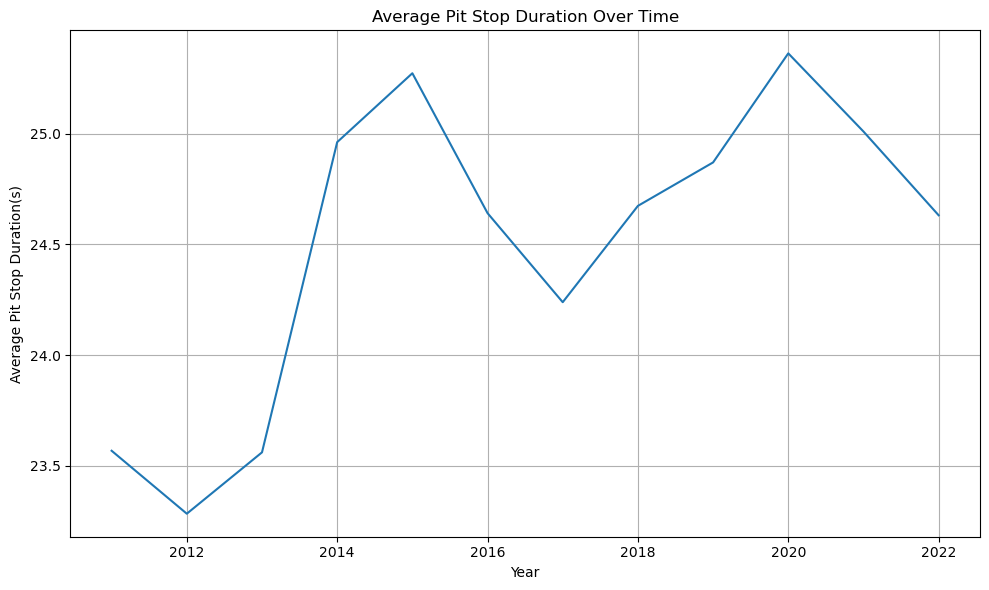

In [48]:
#produce line plot of pit stop duration over time (can later change font size, color, etc.)

year_agg = year_agg.reset_index()

plt.figure(figsize=(10, 6))
plt.plot(year_agg['year'], year_agg['mean_duration'])
plt.xlabel('Year')
plt.ylabel('Average Pit Stop Duration(s)')
plt.title('Average Pit Stop Duration Over Time')
plt.grid(True)
plt.tight_layout()
plt.show() 

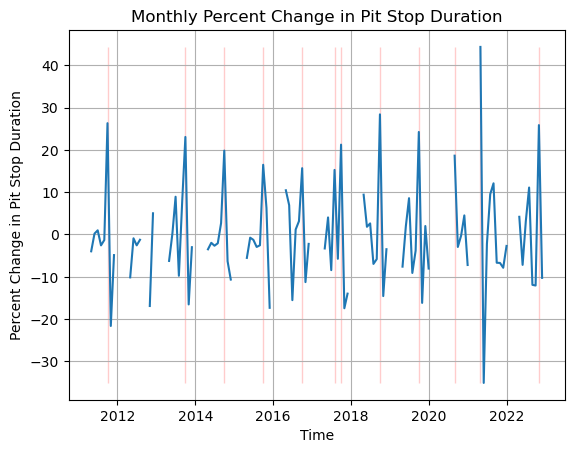

In [65]:
#same as above but percentage change each month
month_config = pd.Grouper(key='date_dt', freq='ME')
monthlyduration = (pit_stops_races_merge
                   .groupby(month_config)
                   .agg(duration_mean=("duration_sec", "mean"))
                   .reset_index()
                   .sort_values("date_dt"))

monthlyduration["diff_duration"] = monthlyduration["duration_mean"].diff()
monthlyduration["lag_duration"] = monthlyduration["duration_mean"].shift(1)
monthlyduration["change_duration"] = (monthlyduration["diff_duration"]/monthlyduration["lag_duration"])* 100

monthlyduration["bool"] = monthlyduration["change_duration"] > 15

plt.plot("date_dt", "change_duration",
          data = monthlyduration)
plt.xlabel("Time")
plt.ylabel("Percent Change in Pit Stop Duration")
plt.grid(True)
plt.title("Monthly Percent Change in Pit Stop Duration")

#highlight time points with a more significant increase in pit stop duration
#this links to the question on pit stop time over seasons
#I will aim to fix the gaps where there is no data
vec_y = monthlyduration["change_duration"]
plt.fill_between(x= monthlyduration["date_dt"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = monthlyduration["bool"],
                 alpha = 0.2,color = "red")

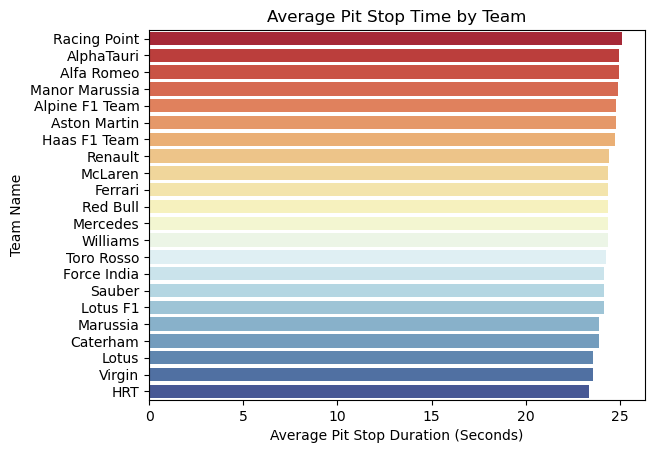

In [51]:
# Plotting The Average Pit Stop Time By Team

sns.barplot(x='avg_duration',y='name', data=results_agg, hue='name', palette='RdYlBu',legend=False)
plt.xlabel('Average Pit Stop Duration (Seconds)')
plt.ylabel('Team Name')
plt.title('Average Pit Stop Time by Team')
plt.show()

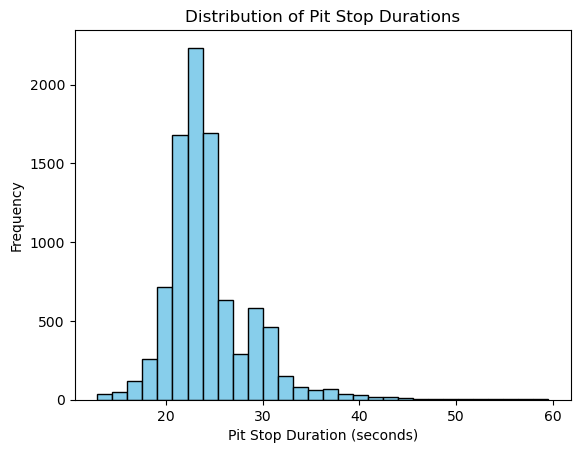

In [52]:
pit_stops_races_merge['duration'] = pd.to_numeric(pit_stops_races_merge['duration'], errors='coerce')

plt.hist(pit_stops_races_merge['duration'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Pit Stop Durations")
plt.xlabel("Pit Stop Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

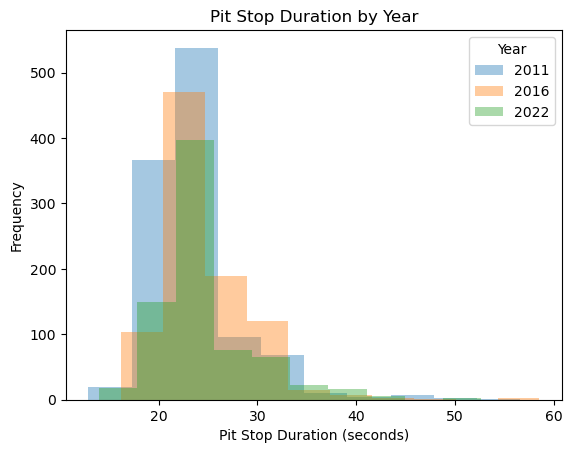

In [53]:
pit_stops_races_merge['duration'] = pd.to_numeric(pit_stops_races_merge['duration'], errors='coerce')

filtered_data = pit_stops_races_merge.query("year == 2011 or year == 2016 or year == 2022")

grouped_data = filtered_data.groupby(['year'])["duration"]

grouped_data.plot.hist(alpha = 0.4)
plt.xlabel("Pit Stop Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Pit Stop Duration by Year")
plt.legend(title = "Year")

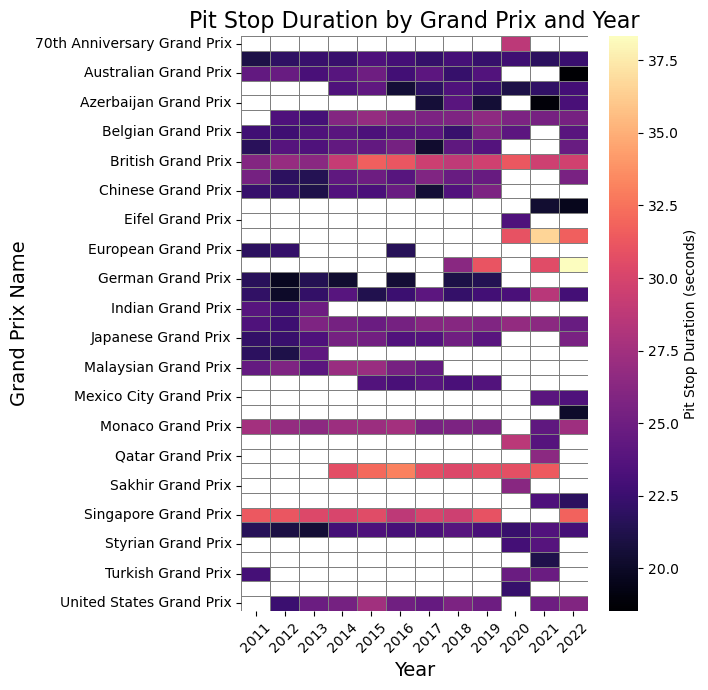

In [62]:
heatmap_data = pit_stops_races_merge.pivot_table(
    index='name',
    columns='year',
    values='duration_sec',
    aggfunc='mean'  )

plt.figure(figsize=(7, 7))

sns.heatmap(
    heatmap_data,
    cmap='magma',      
    linewidths=0.5,       
    linecolor='gray',
    cbar_kws={'label': 'Pit Stop Duration (seconds)'})

plt.title('Pit Stop Duration by Grand Prix and Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Grand Prix Name', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<span style="color: darkblue; font-size: 30px;">Discussion</span>

Provide a brief 1 paragraph markdown chunk summarizing your findings.
Describe the main things you learned from the data.

From the heatmat, we can identify that the Singapore Grand Prix, Qatar Grand Prix, and Brtisih Grand Prix have consistently longer pit stop durations. This could be due to track and environmental factors. For example, the Singapore Grand Prix is a street circuit with tight pit lane entry and exit, humid conditions, and holds night races with a higher chcange of safety cars. All these factors can change team strategy and increase stop durations. This observation reflects the results in the "Monthly Percent Change of Pit Stop Duration", as it corresponds to the observed sharp increase in pit stop duration during September each year, as that is the time of year the Singapore Grand Prix usually takes place. Additionally, September is late in the racing season, so there may be more tactical tire management due to championship battles. "Distribution fo Pit Stop Durations" shows that the distribution has a positive skew, which means that there are a few extremely large observations potentially caused by malfunctions in car repair. The overlapping plot of "Pit Stop Duration By Year" shows that while the meidan pit stop duration increased over the years, the variation decreased as the observations are less spread out. From the graph of change in pit stop duration over time, we see that as years progress, there is a trend for pit stop duration to increase. This may be caused by regulation changes implemented over the years. For example, in 2021, new rules were enforced in September to slow down pit stops to improve safety—directly causing a spike.